# Leveraged Portfolio Analysis #

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.api as sm

# Data
import yfinance as yf

### Download Data ###

In [2]:
# Tickers
index_tickers = ['SSO', 'SPXL', 'UPRO', 'SPY']

In [3]:
# Import data
index_prices = pd.DataFrame()

# Loop for each ticker
for ticker in index_tickers:
    data = yf.download(
        ticker,                     # Stock to import
        start='2010-01-01',         # First Date
        end='2025-01-01',           # Last Date
        interval='1d',              # Daily Basis
        auto_adjust=True,           # Adjusted Prices,
        progress=False              # Not printing
    )
    
    # Flat columns
    data.columns = data.columns.get_level_values(0)
    data.columns = data.columns.str.lower()

    # Use adjusted close price
    close = data['close'].rename(ticker)

    # Concat the Data
    index_prices = pd.concat([index_prices, close], axis=1)
    
    print(f'Data Ready for {ticker}')

# Convert index into a date item
index_prices.index = pd.to_datetime(index_prices.index)

Data Ready for SSO
Data Ready for SPXL
Data Ready for UPRO
Data Ready for SPY


In [4]:
# Show
index_prices

,SSO,SPXL,UPRO,SPY
2010-01-04,4.546842,4.081054,2.077316,85.279205
2010-01-05,4.576792,4.119498,2.095169,85.504944
2010-01-06,4.580251,4.130589,2.101206,85.565147
2010-01-07,4.618265,4.179384,2.126804,85.926331
2010-01-08,4.650521,4.223742,2.147544,86.212265
...,...,...,...,...
2024-12-24,96.941254,181.156418,95.318687,596.076904
2024-12-26,96.961136,181.166321,95.308754,596.116699
2024-12-27,94.893059,175.453125,92.269836,589.841614
2024-12-30,92.705658,169.353088,89.042236,583.110596


### Descriptive Statistics ###

In [5]:
# Calculate Logarithmic Returns
index_returns = np.log(index_prices) - np.log(index_prices.shift(1))
index_returns.dropna(inplace=True)

index_returns

,SSO,SPXL,UPRO,SPY
2010-01-05,0.006566,0.009376,0.008558,0.002644
2010-01-06,0.000755,0.002689,0.002877,0.000704
2010-01-07,0.008265,0.011744,0.012109,0.004212
2010-01-08,0.006960,0.010558,0.009704,0.003322
2010-01-11,0.003215,0.003844,0.003539,0.001396
...,...,...,...,...
2024-12-24,0.020936,0.030746,0.031433,0.011054
2024-12-26,0.000205,0.000055,-0.000104,0.000067
2024-12-27,-0.021560,-0.032044,-0.032404,-0.010582
2024-12-30,-0.023321,-0.035386,-0.035606,-0.011477


In [6]:
# Descriptive Statistics
index_returns.mul(100).describe()

,SSO,SPXL,UPRO,SPY
count,3773.000000,3773.000000,3773.000000,3773.000000
mean,0.079701,0.098426,0.099300,0.050856
std,2.173504,3.270610,3.276856,1.077245
min,-26.602809,-41.357663,-42.995382,-11.588637
25%,-0.746102,-1.125639,-1.114894,-0.371558
50%,0.132106,0.202081,0.201047,0.068185
75%,1.119950,1.692836,1.688190,0.577323
max,17.305232,24.534556,24.659149,8.673087


In [7]:
# Means Ratio (ETF Average Returns / SPY Average Returns)
means = index_returns.mean() / index_returns['SPY'].mean()

means

SSO     1.567195
SPXL    1.935380
UPRO    1.952569
SPY     1.000000
dtype: float64

In [10]:
# Standard Deviations Ratio (ETF Standard Deviation / SPY Standard Deviation)
stds = index_returns.std() / index_returns['SPY'].std()

stds

SSO     2.017650
SPXL    3.036086
UPRO    3.041884
SPY     1.000000
dtype: float64

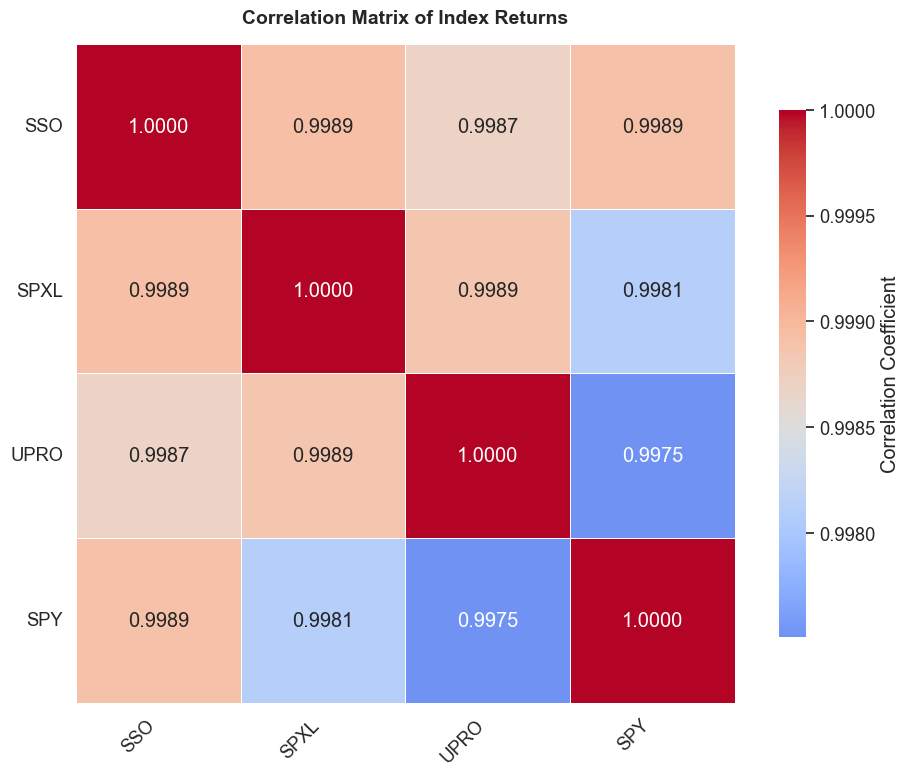

In [11]:
# Correlations Analysis
corrs = index_returns.corr()

# Style
sns.set_theme(style="white", font_scale=1.2)

# Figure
plt.figure(figsize=(10, 8))

# Heatmap
ax = sns.heatmap(
    corrs,
    annot=True,           # Show Values
    fmt=".4f",            # Format
    cmap="coolwarm",      # Palette
    center=0.9985,        # Center
    square=True,          # Square Cells
    linewidths=0.5,       # Grid
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Config
plt.title("Correlation Matrix of Index Returns", fontsize=14, pad=15, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [12]:
# Obtain the Risk Free Rate
rfr = yf.download(
    '^TNX',                     # Stock to import
    start='2010-01-01',         # First Date
    end='2025-01-01',           # Last Date
    interval='1d',              # Daily Basis
    auto_adjust=True,           # Adjusted Prices,
    progress=False              # Not printing
)

# Flat columns
rfr.columns = rfr.columns.get_level_values(0)
rfr.columns = rfr.columns.str.lower()

In [13]:
# Get Risk Free Rate (10-Y Treasury Bond)
risk_free_rate = rfr['close']
risk_free_rate.index = pd.to_datetime(risk_free_rate.index)
risk_free_rate = risk_free_rate / 100 / 365
risk_free_rate.name = 'risk_free_rate'
risk_free_rate = risk_free_rate.reindex(index_returns.index).ffill()

risk_free_rate

2010-01-05    0.000103
2010-01-06    0.000104
2010-01-07    0.000105
2010-01-08    0.000104
2010-01-11    0.000105
                ...   
2024-12-24    0.000126
2024-12-26    0.000125
2024-12-27    0.000127
2024-12-30    0.000125
2024-12-31    0.000125
Name: risk_free_rate, Length: 3773, dtype: float64

In [14]:
# Descriptive Statistics
risk_free_rate.mul(100).describe()

count    3773.000000
mean        0.006828
std         0.002559
min         0.001367
25%         0.004997
50%         0.006510
75%         0.008227
max         0.013666
Name: risk_free_rate, dtype: float64

In [15]:
# Calculate Excess Returns
excess_returns = index_returns.subtract(risk_free_rate, axis = 0)
excess_returns.dropna(inplace=True)

# Descriptive Statistics
excess_returns.mul(100).describe()

,SSO,SPXL,UPRO,SPY
count,3773.000000,3773.000000,3773.000000,3773.000000
mean,0.072874,0.091598,0.092472,0.044028
std,2.173512,3.270612,3.276860,1.077254
min,-26.604804,-41.359657,-42.997377,-11.590631
25%,-0.751541,-1.129576,-1.125281,-0.377725
50%,0.123441,0.197198,0.195365,0.059113
75%,1.114198,1.687527,1.679357,0.570344
max,17.302996,24.532321,24.656914,8.670851


In [16]:
# Ratios
excess_means = excess_returns.mean() / excess_returns['SPY'].mean()

excess_means

SSO     1.655155
SPXL    2.080438
UPRO    2.100293
SPY     1.000000
dtype: float64

In [17]:
# Ratios
excess_stds = excess_returns.std() / excess_returns['SPY'].std()

excess_stds

SSO     2.017640
SPXL    3.036063
UPRO    3.041863
SPY     1.000000
dtype: float64

### Regression Analysis ###

In [18]:
# Set the arrays
y_matrix = excess_returns.mul(100).drop(columns='SPY')
x_matrix = excess_returns.mul(100)['SPY']

# Add constant
x_matrix = sm.add_constant(x_matrix)

In [19]:
# Exponential Weights
def wexp(N, half_life):
    c = np.log(0.5) / half_life
    n = np.array(range(N))
    w = np.exp(c * n)
    return np.flip(w / np.sum(w))

# Calculate Weights
# Set the Window
window = len(y_matrix)
weights = window * wexp(window, window/2)

In [20]:
# We can use StatsModels efficiently to get the betas for the whole history
alphas_list = []
betas_list = []

# Loop to Obtain Betas and Alpha + Residuals
for ticker in y_matrix.columns:
    # Define series
    y_series = y_matrix[ticker].dropna()
    
    # Define weights
    model = sm.WLS(y_series, x_matrix.loc[y_series.index], weights=weights)
    results = model.fit()
    
    alpha = results.params.iloc[0]
    beta = results.params.iloc[1]
    
    alphas_list.append(alpha)
    betas_list.append(beta)
    
    print(results.summary())

# Create Beta Series
betas_series = pd.Series(betas_list, index=y_matrix.columns)
betas_series.name = 'history_beta'

                            WLS Regression Results                            
Dep. Variable:                    SSO   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.856e+06
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:01:12   Log-Likelihood:                 3199.1
No. Observations:                3773   AIC:                            -6394.
Df Residuals:                    3771   BIC:                            -6382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0185      0.002    -11.372      0.0

Note that we can observe from the betas that SSO is a 2:1 leveraged version of SPY, while SPXL and UPRO are the 3:1 leveraged versions of the same ETF.

### Rolling Betas ###

In [21]:
# Returns
returns = excess_returns.mul(100)
window = 252

# Create the DataFrame
betas_df = pd.DataFrame()

# Loop for stocks
for stock in index_tickers[:3]:
    betas_list = []
    dates = []

    # Loop for Dates
    for end in range(window, len(y_series)):
        # Start Date
        start = end - window
        
        # Arrays
        y_window = returns[stock].iloc[start:end]
        x_window = returns['SPY'].iloc[start:end]
        
        # Add constant
        x_matrix = sm.add_constant(x_window)
        
        # Weights
        weights = 252 * wexp(252, 126)
        
        # WLS Regression
        model = sm.WLS(y_window, x_matrix, weights=weights)
        results = model.fit()
        
        # Extract Betas
        beta = results.params.iloc[1]
        
        # Store Betas and Dates
        betas_list.append(beta)
        dates.append(y_series.index[end])  # guardar fecha del último punto

    # Convert to Series
    rolling_betas = pd.Series(betas_list, index=dates)
    
    # Store in DataFrame
    betas_df[stock] = rolling_betas

In [22]:
# Show
betas_df

,SSO,SPXL,UPRO
2011-01-04,1.999225,2.995803,2.948375
2011-01-05,1.999197,2.996014,2.948442
2011-01-06,1.999247,2.996056,2.948981
2011-01-07,1.999166,2.995884,2.948930
2011-01-10,1.999104,2.995602,2.948790
...,...,...,...
2024-12-24,1.995773,2.992637,3.007635
2024-12-26,1.994865,2.990765,3.006389
2024-12-27,1.994859,2.990723,3.006371
2024-12-30,1.994997,2.990283,3.006183


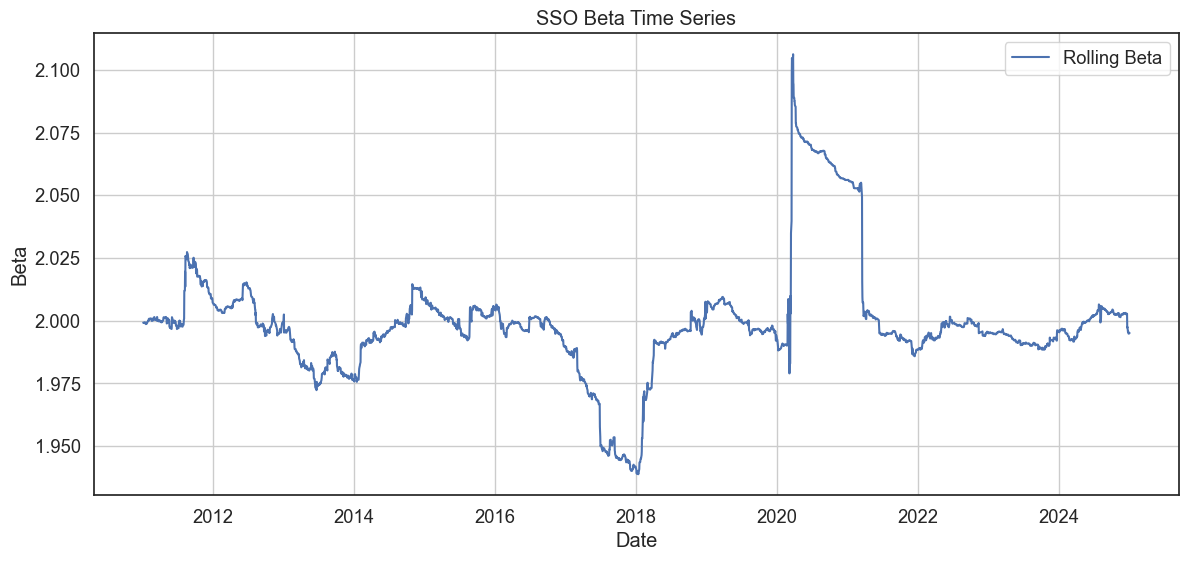

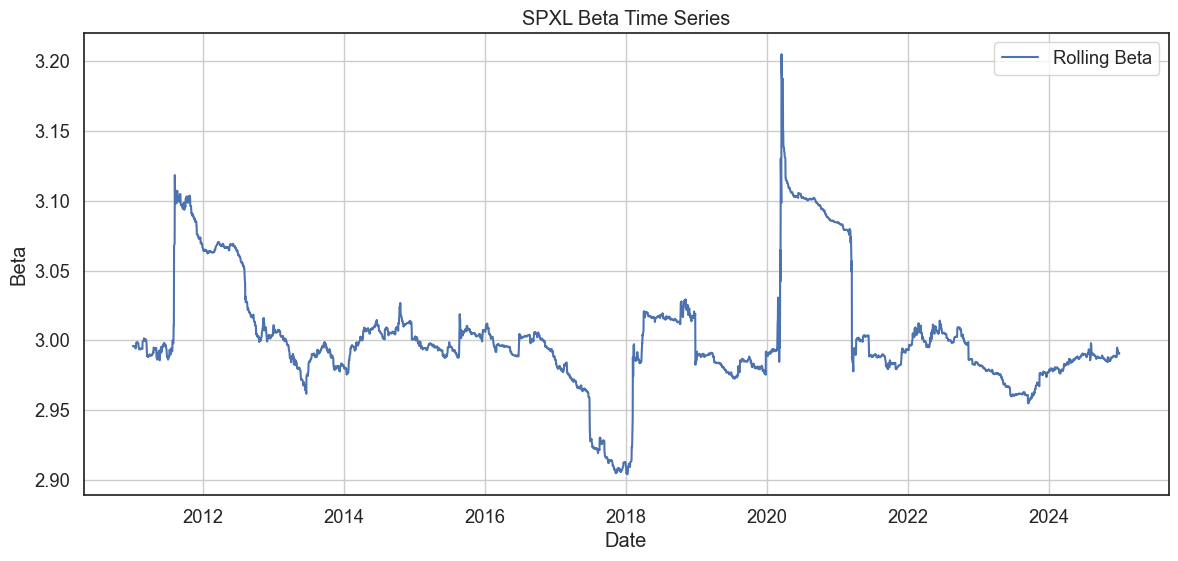

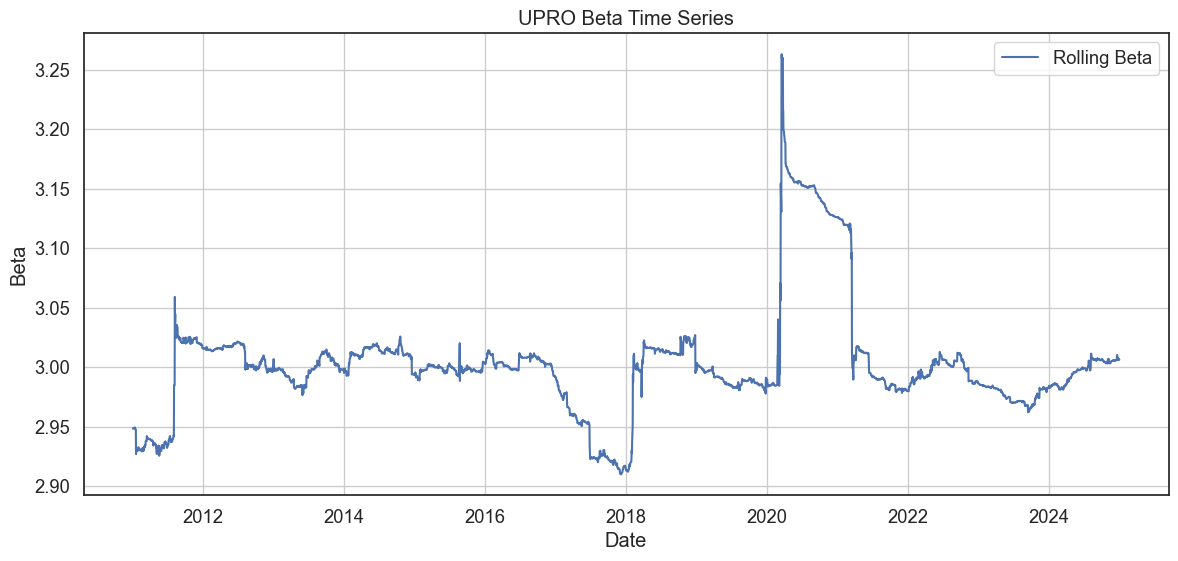

In [23]:
# Create Plots
for stock in index_tickers[:3]:
    # Create Plot for the Residual Returns
    plt.figure(figsize=(14, 6))
    plt.plot(
        betas_df[stock], 
        label='Rolling Beta', 
        alpha=1
        )

    # Config
    plt.title(f'{stock} Beta Time Series')
    plt.xlabel('Date')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid()

    # Show
    plt.show()

In [25]:
# Adjusted Betas
adjusted_betas_df = betas_df.copy()
adjusted_betas_df['SSO'] = adjusted_betas_df['SSO'] / 2
adjusted_betas_df['SPXL'] = adjusted_betas_df['SPXL'] / 3
adjusted_betas_df['UPRO'] = adjusted_betas_df['UPRO'] / 3

adjusted_betas_df

,SSO,SPXL,UPRO
2011-01-04,0.999612,0.998601,0.982792
2011-01-05,0.999598,0.998671,0.982814
2011-01-06,0.999624,0.998685,0.982994
2011-01-07,0.999583,0.998628,0.982977
2011-01-10,0.999552,0.998534,0.982930
...,...,...,...
2024-12-24,0.997887,0.997546,1.002545
2024-12-26,0.997432,0.996922,1.002130
2024-12-27,0.997429,0.996908,1.002124
2024-12-30,0.997499,0.996761,1.002061


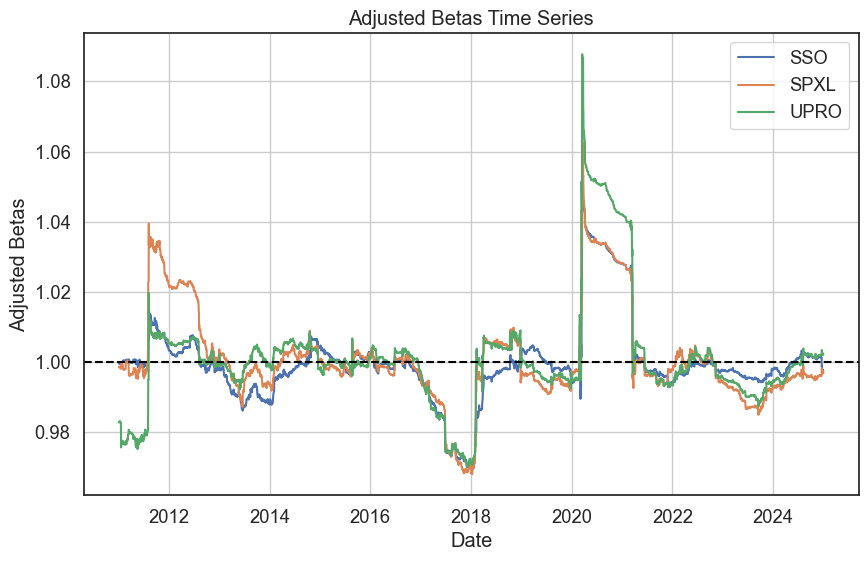

In [27]:
# Create Plot for the Residual Returns
plt.figure(figsize=(10, 6))
plt.plot(
    adjusted_betas_df, 
    label=adjusted_betas_df.columns, 
    alpha=1
    )

# Add horizontal line at y=3
plt.axhline(y=1, color='black', linestyle='--')

# Config
plt.title('Adjusted Betas Time Series')
plt.xlabel('Date')
plt.ylabel('Adjusted Betas')
plt.legend()
plt.grid()

# Show
plt.show()

### Rolling Ratios ###

In [28]:
######################
### Rolling Ratios ###
######################

# Rolling Statistics for SPY
market_mean = returns['SPY'].rolling(window=252).mean().dropna()
market_std = returns['SPY'].rolling(window=252).std().dropna()

# DataFrames
mean_ratios = pd.DataFrame()
std_ratios = pd.DataFrame()

# Loop for each stock
for stock in index_tickers[:3]:
    
    # Rolling Stats
    roll_mean = returns[stock].rolling(window=252).mean().dropna()
    roll_std = returns[stock].rolling(window=252).std().dropna()
    
    # Ratios
    mean_rto = roll_mean / market_mean
    std_rto = roll_std / market_std
    
    # Store
    mean_ratios[stock] = mean_rto
    std_ratios[stock] = std_rto

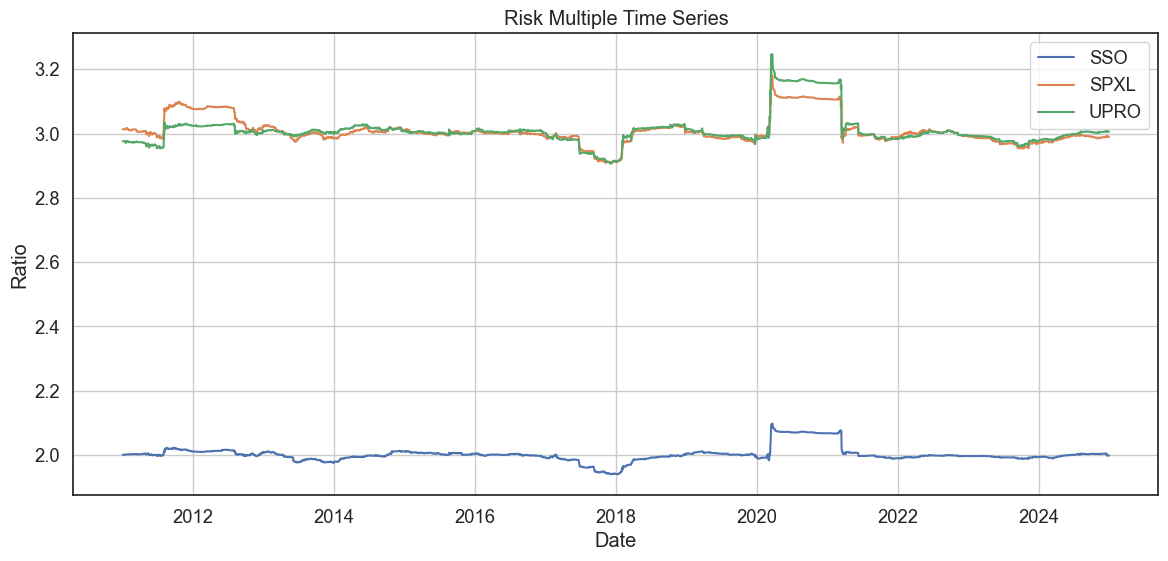

In [29]:
# Create Plot for the Residual Returns
plt.figure(figsize=(14, 6))
plt.plot(
    std_ratios, 
    label=std_ratios.columns, 
    alpha=1
    )

# Config
plt.title('Risk Multiple Time Series')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.grid()

# Show
plt.show()


### Factor Attribution ###

In [30]:
capmbeta_returns = pd.DataFrame()
specific_returns = pd.DataFrame()

for stock in index_tickers[:3]:
    
    # Get the Beta
    stock_beta = betas_series[stock]

    # r_i: stock returns
    r_i = excess_returns[stock]

    # r_m: market returns (factor)
    r_m = excess_returns['SPY']
    r_m.name = 'market_returns'

    # r_f: factor returns (beta * r_m)
    r_f = stock_beta * r_m
    r_f.name = 'factor_return'

    # r_e: residual returns (r_i - r_f)
    r_e = r_i - r_f
    r_e.name = 'residual_returns'
    
    # Store
    capmbeta_returns[stock] = r_f
    specific_returns[stock] = r_e

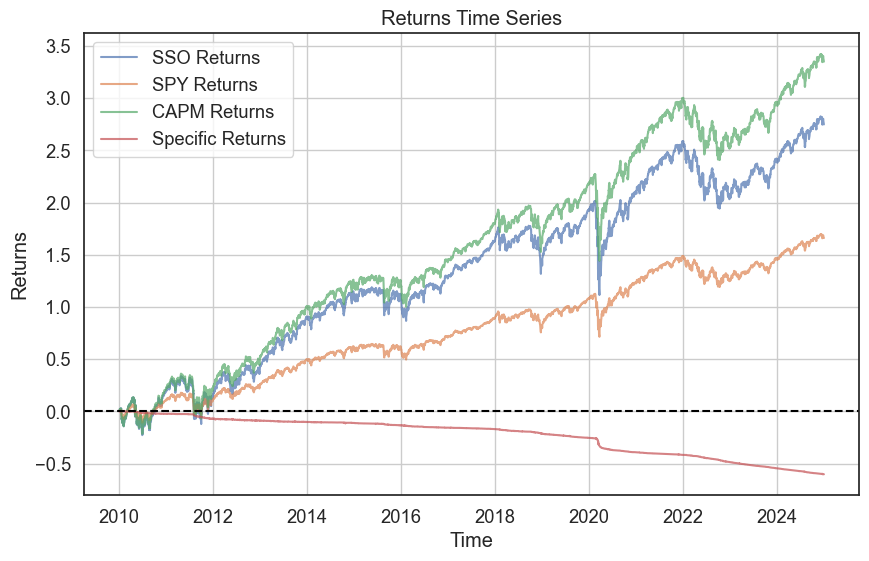

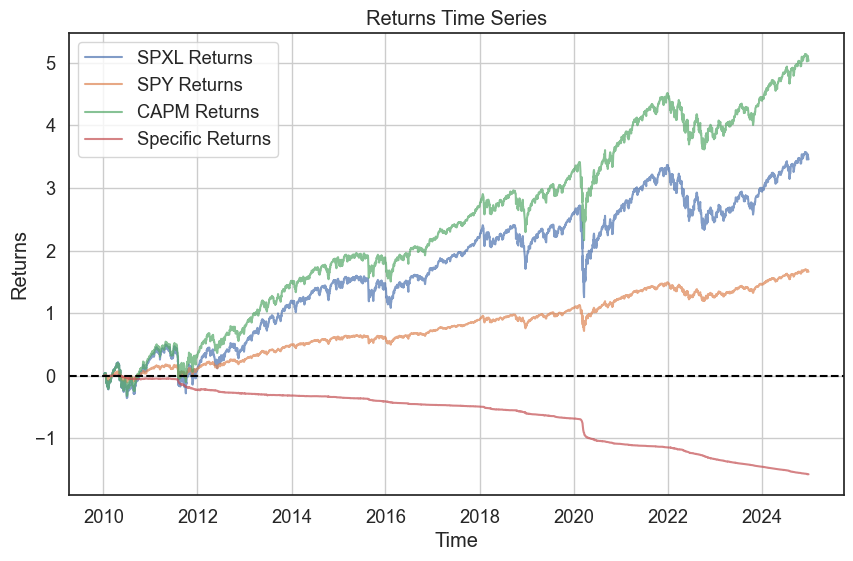

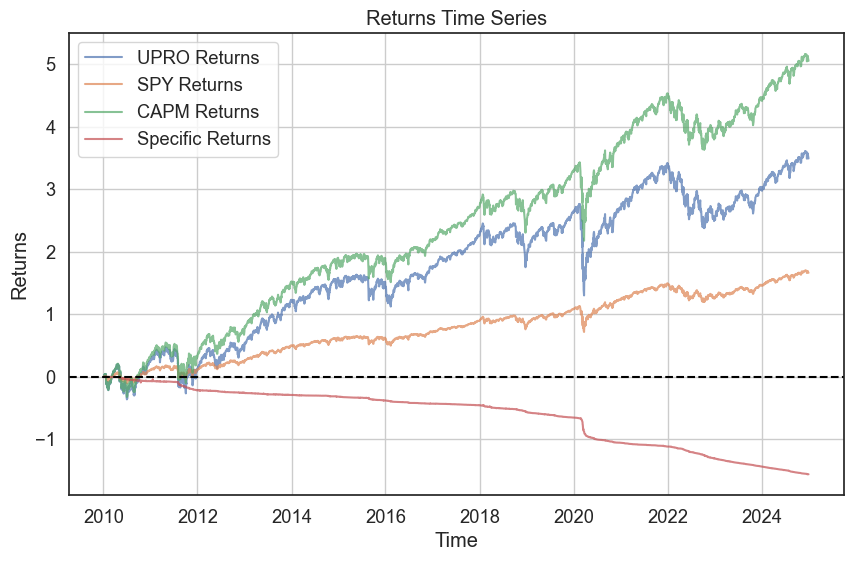

In [31]:
# Plot Loop
for stock in index_tickers[:3]:
    # Create the Plot
    plt.figure(figsize=(10, 6))
    plt.plot(excess_returns[stock].cumsum(), label=f'{stock} Returns', alpha=0.7)
    plt.plot(excess_returns['SPY'].cumsum(), label='SPY Returns', alpha=0.7)
    plt.plot(capmbeta_returns[stock].cumsum(), label='CAPM Returns', alpha=0.7)
    plt.plot(specific_returns[stock].cumsum(), label='Specific Returns', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='dashed')
    
    # Config
    plt.title('Returns Time Series')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.legend()
    
    # Show
    plt.grid()
    plt.show()

In [32]:
# Average Specific Returns
specific_means = specific_returns.mean()

specific_means

SSO    -0.000159
SPXL   -0.000417
UPRO   -0.000413
dtype: float64

In [33]:
# Ratio
specific_ratio = specific_means / index_returns['SPY'].mean()

specific_ratio

SSO    -0.313331
SPXL   -0.820226
UPRO   -0.812993
dtype: float64

### Variance Decomposition ###

In [34]:
# Choose a Stock
unique_stock = 'UPRO'

# OLS Model
model = sm.OLS(
    returns[unique_stock],
    sm.add_constant(returns['SPY'])
    )

# Model Results
results = model.fit()

# Beta
ols_beta = results.params.iloc[1]

In [35]:
# First Calculate the Variance of the Stock
stock_variance = returns[unique_stock].var()

print(f'Stock Variance: {stock_variance}')

Stock Variance: 10.73780913974305


In [36]:
# Now calculate the Variance of the Market
market_variance = returns['SPY'].var()

print(f'Market Variance: {market_variance}')

Market Variance: 1.1604768144879933


In [37]:
# Variance Ratio
variances_ratio = stock_variance / market_variance

print(f'{stock} Variance is {variances_ratio: .4} higher than the Market')

UPRO Variance is  9.253 higher than the Market


In [38]:
# And the Residuals Variance
stocks_market_corr = returns[unique_stock].corr(returns['SPY'])
squared_rho = stocks_market_corr ** 2

# Calculate Residual Variance
resid_variance = (1 - squared_rho) * stock_variance

print(f'Residual Variance: {resid_variance}')

Residual Variance: 0.05348867697901702


In [39]:
# Factor Variance
squared_beta = ols_beta ** 2
factor_variance = squared_beta * market_variance

print(f'Factor Variance: {factor_variance}')

Factor Variance: 10.684320462764049


In [40]:
estimated_stock_variance = factor_variance + resid_variance

print(f'Stock Variance: {estimated_stock_variance}')

Stock Variance: 10.737809139743066


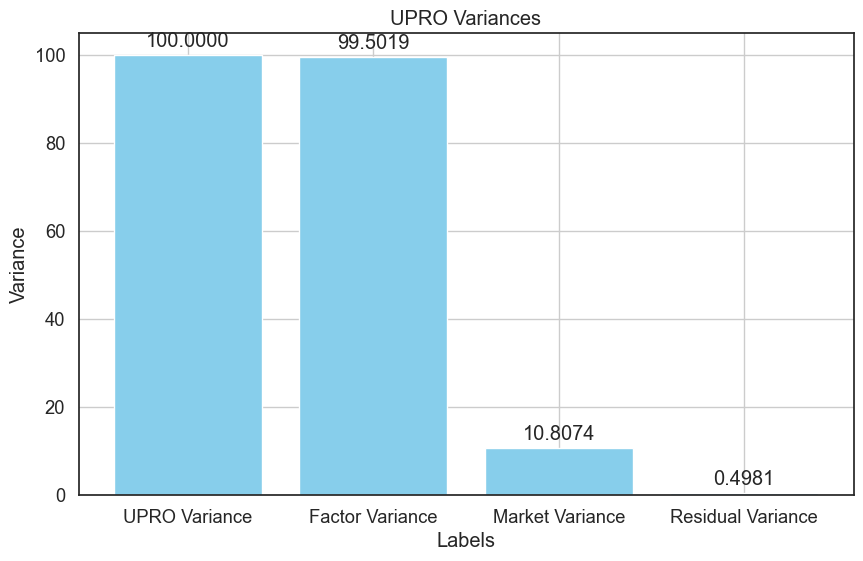

In [41]:
# Label
labels = [
    f'{unique_stock} Variance', 
    'Factor Variance', 
    'Market Variance', 
    'Residual Variance'
    ]

#  Values
values = pd.Series([
    stock_variance,
    factor_variance,
    market_variance,
    resid_variance,
    ],
    index=labels
    )

values = values * 100 / stock_variance

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(values.index, values.values, color='skyblue')

ax.bar_label(bars, labels=[f"{v:.4f}" for v in values.values], padding=3)

# Configuration
plt.title(f'{unique_stock} Variances')
plt.xlabel('Labels')
plt.ylabel('Variance')
plt.grid()

# Show
plt.show()

### Volatility Drag ###

In [42]:
# Create the DataFrame
drag_df = index_returns[['SSO', 'SPXL', 'UPRO']].mean()
drag_df.name = 'mean_daily_returns'

drag_df = pd.DataFrame(drag_df)

drag_df

,mean_daily_returns
SSO,0.000797
SPXL,0.000984
UPRO,0.000993


In [43]:
# Benchmark (SPY) Statistics
benchmark_mean = index_returns['SPY'].mean()
benchmark_var = index_returns['SPY'].var()

# Leveraged Ratios
leverage_ratios = [2, 3, 3]
mean_daily_returns = drag_df['mean_daily_returns'].values

# Ideal daily returns (sin drag)
ideal_returns = [benchmark_mean * L for L in leverage_ratios]

# Theoretical volatility drag
theoretical_drag = [0.5 * L * (L - 1) * benchmark_var for L in leverage_ratios]

In [44]:
# Add to DataFrame
drag_df['ideal_daily_returns'] = ideal_returns
drag_df['theoretical_drag'] = theoretical_drag

# Observed drag (from data)
drag_df['observed_drag'] = drag_df['ideal_daily_returns'] - drag_df['mean_daily_returns']

# Unexplained drag
drag_df['unexplained_drag'] = drag_df['observed_drag'] - drag_df['theoretical_drag']

drag_df * 100

,mean_daily_returns,ideal_daily_returns,theoretical_drag,observed_drag,unexplained_drag
SSO,0.079701,0.101712,0.011605,0.022011,0.010406
SPXL,0.098426,0.152568,0.034814,0.054142,0.019329
UPRO,0.099300,0.152568,0.034814,0.053268,0.018455
